### This file filters the trump tweets from the sample set.

In [14]:
import pandas as pd
import re
import emoji
import matplotlib.pyplot as plt
import numpy as np
import itertools
from itertools import groupby, islice

In [15]:
covid = pd.read_csv('covid19_tweets_final.csv',encoding = 'utf-8')

In [16]:
covid.head(10)

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,weekday,hour,tweet_length,sentiment_tag_hf,sentiment_score_hf,sentiment_score_tb,subjectivity_score_tb,sentiment_score_nltk,id,topic_list
0,0,Taya ❤,NaN,I don't follow back,2011-10-01 05:55:50,283,0,8324,False,2020-01-27 00:24:01,...,0,0,112,NEGATIVE,0.997167,0.000000,0.000000,-0.7430,0,"['year grabe january', 'coronavirus kobe']"
1,1,Eric Ng,Hong Kong,"Hong Kong-based senior business reporter, Sout...",2015-02-23 12:28:27,1000,191,1,True,2020-01-27 00:37:26,...,0,0,102,NEGATIVE,0.999039,0.000000,0.000000,-0.0516,1,"['casinos hurt s', 'wuhan virus shot', 'health..."
2,2,Greg Folkers,"Washington, D.C., U.S.A.","Washington, DC",2009-05-21 17:03:17,4188,178,875,False,2020-01-27 00:50:36,...,0,0,137,NEGATIVE,0.980284,0.000000,0.000000,0.5267,2,"['aovlpgufvm s', 'transmission dynamics']"
3,3,Deplorable Chump Texanon,"Texas, USA","God, Family, Country. God Wins! I love my won...",2009-03-26 20:31:39,675,987,3491,False,2020-01-27 00:58:18,...,0,0,212,NEGATIVE,0.971413,0.000000,0.450000,-0.7430,3,"['humanity s', 'coronavirus hits', 'infection ..."
4,4,Luke Waltham⁷,contactlukewaltham@gmail.com,22. Bisexual. Queer. He/They. Intersectional F...,2012-09-09 00:19:29,220029,9268,233087,True,2020-01-27 00:58:25,...,0,0,275,NEGATIVE,0.993612,0.000000,0.180000,-0.9524,4,"['fear getting', 'indigenous people', 'killed ..."
5,5,CP24,Toronto,Official account of CP24 - Toronto and the GTA...,2009-01-28 04:56:13,1952779,371,1,True,2020-01-27 01:00:00,...,0,1,105,NEGATIVE,0.989554,0.000000,0.000000,0.0000,5,['outbreak s']
6,6,Amber 香港 😷✋☝️🇭🇰🆘🙏,Hong Kong,家庭煮婦，香港媽媽，支持自由、民主、人權、法治，願所有好人一生都平安🙏🤝🙇💪 I'm a H...,2019-09-04 20:28:23,2907,4914,59928,False,2020-01-27 01:15:57,...,0,1,304,NEGATIVE,0.996265,0.122500,0.565000,0.6597,6,"['want better leader', 'good living standard',..."
7,7,Steven Lee Myers,NaN,The New York Times in Beijing. Formerly in Mos...,2009-04-21 14:14:37,15781,1366,2691,False,2020-01-27 01:21:52,...,0,1,159,NEGATIVE,0.954377,0.133333,0.800000,-0.5242,7,['late s']
8,8,Solomon Yue,"Salem, Oregon, USA","Vice Chairman & CEO at Republicans Overseas, R...",2013-04-09 15:38:48,194950,424,61427,False,2020-01-27 01:31:59,...,0,1,247,NEGATIVE,0.997793,-0.108333,0.175000,-0.9523,8,"['kill foreign enemies', 'becomes emperor shit..."
9,9,Peter Billerbeck,NaN,Current @HouseForeign | Fmr @TeamMoulton Sr Ad...,2010-08-09 22:32:27,1195,2165,4772,False,2020-01-27 01:42:56,...,0,1,278,NEGATIVE,0.998627,0.077679,0.553571,0.0000,9,"['senior admin official', 'note trump admin', ..."


In [17]:
covid.head(10)

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,weekday,hour,tweet_length,sentiment_tag_hf,sentiment_score_hf,sentiment_score_tb,subjectivity_score_tb,sentiment_score_nltk,id,topic_list
0,0,Taya ❤,NaN,I don't follow back,2011-10-01 05:55:50,283,0,8324,False,2020-01-27 00:24:01,...,0,0,112,NEGATIVE,0.997167,0.000000,0.000000,-0.7430,0,"['year grabe january', 'coronavirus kobe']"
1,1,Eric Ng,Hong Kong,"Hong Kong-based senior business reporter, Sout...",2015-02-23 12:28:27,1000,191,1,True,2020-01-27 00:37:26,...,0,0,102,NEGATIVE,0.999039,0.000000,0.000000,-0.0516,1,"['casinos hurt s', 'wuhan virus shot', 'health..."
2,2,Greg Folkers,"Washington, D.C., U.S.A.","Washington, DC",2009-05-21 17:03:17,4188,178,875,False,2020-01-27 00:50:36,...,0,0,137,NEGATIVE,0.980284,0.000000,0.000000,0.5267,2,"['aovlpgufvm s', 'transmission dynamics']"
3,3,Deplorable Chump Texanon,"Texas, USA","God, Family, Country. God Wins! I love my won...",2009-03-26 20:31:39,675,987,3491,False,2020-01-27 00:58:18,...,0,0,212,NEGATIVE,0.971413,0.000000,0.450000,-0.7430,3,"['humanity s', 'coronavirus hits', 'infection ..."
4,4,Luke Waltham⁷,contactlukewaltham@gmail.com,22. Bisexual. Queer. He/They. Intersectional F...,2012-09-09 00:19:29,220029,9268,233087,True,2020-01-27 00:58:25,...,0,0,275,NEGATIVE,0.993612,0.000000,0.180000,-0.9524,4,"['fear getting', 'indigenous people', 'killed ..."
5,5,CP24,Toronto,Official account of CP24 - Toronto and the GTA...,2009-01-28 04:56:13,1952779,371,1,True,2020-01-27 01:00:00,...,0,1,105,NEGATIVE,0.989554,0.000000,0.000000,0.0000,5,['outbreak s']
6,6,Amber 香港 😷✋☝️🇭🇰🆘🙏,Hong Kong,家庭煮婦，香港媽媽，支持自由、民主、人權、法治，願所有好人一生都平安🙏🤝🙇💪 I'm a H...,2019-09-04 20:28:23,2907,4914,59928,False,2020-01-27 01:15:57,...,0,1,304,NEGATIVE,0.996265,0.122500,0.565000,0.6597,6,"['want better leader', 'good living standard',..."
7,7,Steven Lee Myers,NaN,The New York Times in Beijing. Formerly in Mos...,2009-04-21 14:14:37,15781,1366,2691,False,2020-01-27 01:21:52,...,0,1,159,NEGATIVE,0.954377,0.133333,0.800000,-0.5242,7,['late s']
8,8,Solomon Yue,"Salem, Oregon, USA","Vice Chairman & CEO at Republicans Overseas, R...",2013-04-09 15:38:48,194950,424,61427,False,2020-01-27 01:31:59,...,0,1,247,NEGATIVE,0.997793,-0.108333,0.175000,-0.9523,8,"['kill foreign enemies', 'becomes emperor shit..."
9,9,Peter Billerbeck,NaN,Current @HouseForeign | Fmr @TeamMoulton Sr Ad...,2010-08-09 22:32:27,1195,2165,4772,False,2020-01-27 01:42:56,...,0,1,278,NEGATIVE,0.998627,0.077679,0.553571,0.0000,9,"['senior admin official', 'note trump admin', ..."


In [18]:
trump = covid[covid['user_name'] == 'Donald J. Trump']

In [19]:
trump

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,weekday,hour,tweet_length,sentiment_tag_hf,sentiment_score_hf,sentiment_score_tb,subjectivity_score_tb,sentiment_score_nltk,id,topic_list
639,639,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,88541031,50,6,True,2020-01-30 00:06:52,...,3,0,283,POSITIVE,0.999464,0.808333,0.516667,0.9027,639,"['best experts anywhere', 'also working closel..."
965,965,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,88541842,50,6,True,2020-01-30 22:04:35,...,3,22,107,NEGATIVE,0.979025,0.350000,0.800000,0.4404,965,"['working closely', 'good recovery', 'coronavi..."
1564,1564,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,88542076,50,6,True,2020-02-03 16:51:40,...,0,16,276,POSITIVE,0.875790,0.766667,0.666667,0.8675,1564,"['nobody else could', 'great trade deals', 'gr..."
2026,2026,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,88479986,50,6,True,2020-02-07 10:31:22,...,4,10,280,POSITIVE,0.999785,0.262708,0.724583,0.8474,2026,"['even building hospitals', 'president xi', 'p..."
3776,3776,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,88545542,50,6,True,2020-02-21 15:24:28,...,4,15,255,NEGATIVE,0.993762,0.000000,0.750000,0.0000,3776,"['others fully kick', 'trade deals', 'federal ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82207,82207,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,88491734,50,6,True,2020-09-14 20:56:10,...,0,20,139,NEGATIVE,0.999475,-0.875000,0.666667,-0.7706,82207,"['rigged ballot scam', 'congratulations pennsy..."
82933,82933,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,88549921,50,6,True,2020-09-16 01:49:22,...,2,1,38,NEGATIVE,0.999651,0.000000,0.000000,-0.4451,82933,[]
84669,84669,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,88315489,50,6,True,2020-09-18 15:26:41,...,4,15,175,NEGATIVE,0.988594,0.030000,0.493333,-0.9092,84669,"['shoot straight', 'biden failed badly', 'swin..."
90993,90993,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,88300455,50,6,True,2020-09-30 01:35:28,...,2,1,103,NEGATIVE,0.998304,0.000000,0.000000,-0.5983,90993,"['people would', 'joe biden']"


In [20]:
def extractMentions(text):
    '''Extract @ information from tweets'''
    pattern = "\@\w+"
    mention = []
    for i in range(len(text)):
        mention.append(re.findall(pattern, str(text[i]) ))
    return mention

def extractHashTags(text):
    '''Extract # information from tweets'''
    pattern = "\#\w+"
    hashtag = []
    for i in range(len(text)):
        hashtag.append(re.findall(pattern, str(text[i]) ))
    return hashtag

def extractEmoji(text):
    '''Extract Emojis from tweets'''
    pattern = "\:\w+\:"
    emoji_list = []
    for i in range(len(text)):
        emoji_list.append(re.findall(pattern, emoji.demojize(str(text[i]))))
    return emoji_list

In [21]:
hashtags = extractHashTags(trump['full_text'].values)
mentions = extractMentions(trump['full_text'].values)
emojis = extractEmoji(trump['full_text'].values)

In [22]:
def top_k_entities(extracted, k, extract_type, plot = True):
    individual_entity = list(itertools.chain(*extracted))
    entity_freq = {}
    if extract_type == "Hashtags":
        for item in individual_entity: 
            if (item in entity_freq): 
                entity_freq[item] += 1
            else:
                if len(re.findall('covid|coronavirus',item,re.IGNORECASE)) == 0:
                    entity_freq[item] = 1
    else:
        for item in individual_entity: 
            if (item in entity_freq): 
                entity_freq[item] += 1
            else: 
                entity_freq[item] = 1
    entity_freq_sorted = {k: v for k, v in sorted(entity_freq.items(), key=lambda item: item[1],reverse=True)}
    entity_freq_top_k = list(islice(entity_freq_sorted.items(), k))
    entity_freq_top_k_tags = [i[0] for i in entity_freq_top_k]
    entity_freq_top_k_freq = [i[1] for i in entity_freq_top_k]
    if plot:
        plt.figure(figsize=(15,8))
        plt.bar(entity_freq_top_k_tags,entity_freq_top_k_freq)
        plt.title('Histogram of the Top '+str(k)+ ' '+extract_type)
        plt.xticks(rotation=30)
        plt.show()
    return entity_freq_top_k,entity_freq_top_k_tags,entity_freq_top_k_freq
    

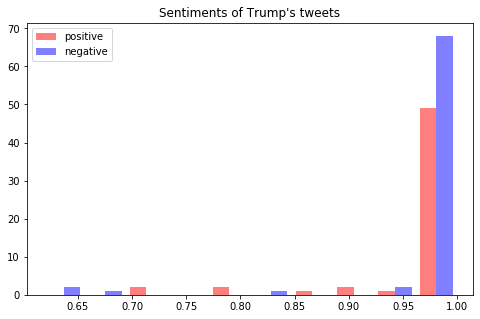

In [26]:
plt.figure(figsize=(8,5))
plt.hist([trump['sentiment_score_hf'][trump['sentiment_tag_hf'] == 'POSITIVE'],trump['sentiment_score_hf'][trump['sentiment_tag_hf'] == 'NEGATIVE']],color = ['red','blue'],label = ['positive','negative'],alpha = 0.5)
plt.title('Sentiments of Trump\'s tweets')
plt.legend()
plt.show()

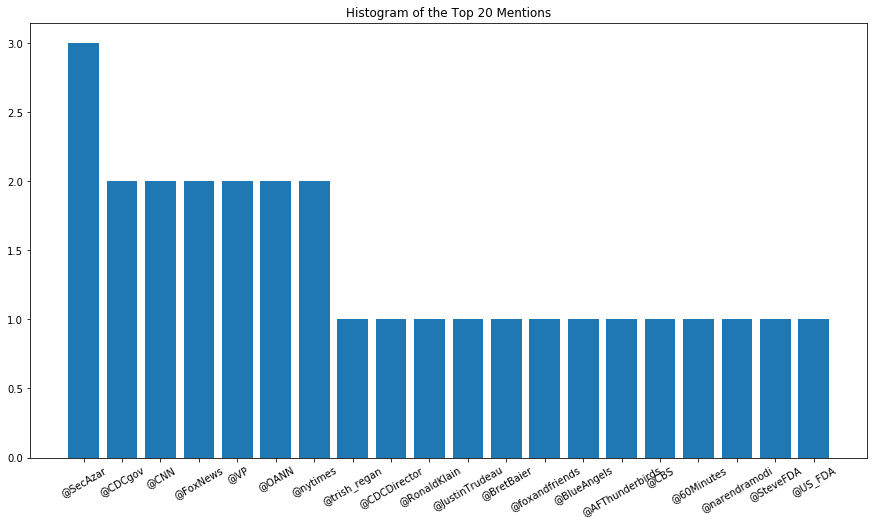

In [27]:
_ = top_k_entities(mentions,20,'Mentions')

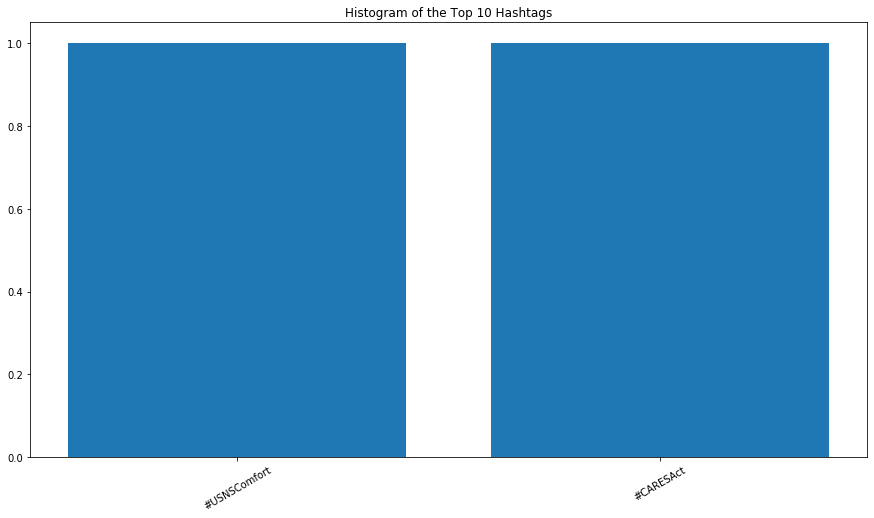

In [28]:
_ = top_k_entities(hashtags,10,'Hashtags')

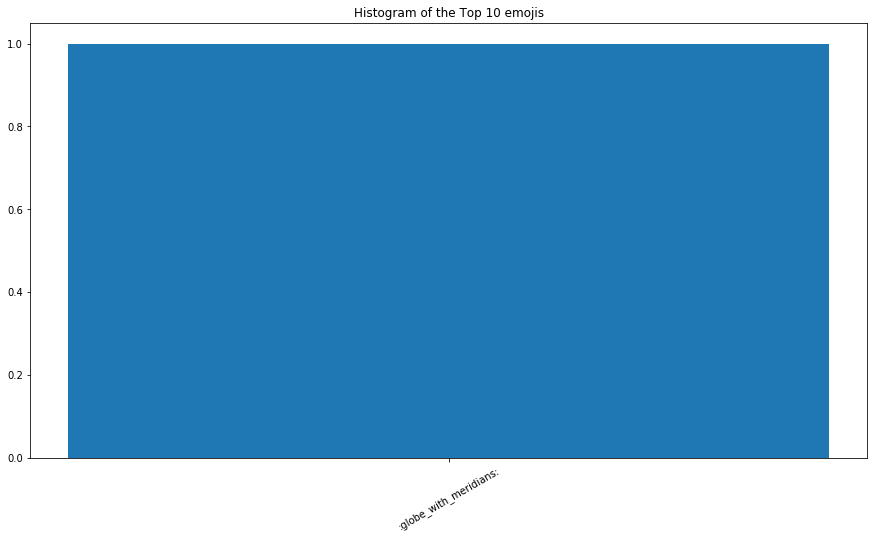

In [29]:
_ = top_k_entities(emojis,10,'emojis')

In [30]:
trump_raw_tweets = trump[['date','full_text','sentiment_tag_hf','sentiment_score_hf','tweet_length']]

In [34]:
trump_raw_tweets = trump_raw_tweets.rename(columns={'sentiment_tag_hf':'sentiment','sentiment_score_hf':'sentiment_score'})

In [ ]:
trump_raw_tweets['sentiment_score'] = [-trump_raw_tweets['sentiment_score'].iloc[i] if trump_raw_tweets['sentiment'].iloc[i] == 'NEGATIVE' else trump_raw_tweets['sentiment_score'].iloc[i] \
                                       for i in range(len(trump_raw_tweets)) 
                                      ]


In [51]:
trump_raw_tweets.to_csv('code/trump_raw_tweets.csv',index=None)

In [31]:
emoji.emojize(':globe_with_meridians:')

'🌐'

In [57]:
def parseMonth(text):
    return re.search('2020-0(\d)-',text).group(1)

In [58]:
trump['month'] = [parseMonth(i) for i in trump['date']]

/Users/ivywang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [205]:
topicByMonth = trump.groupby(['month'])['topic_list'].agg(lambda x: x.tolist()).reset_index()

In [206]:
topicByMonth

,month,topic_list
0,1,"[['best experts anywhere', 'also working close..."
1,2,"[['nobody else could', 'great trade deals', 'g..."
2,3,"[['screening travelers prior', 'areas within']..."
3,4,"[[], [], ['social distancing etc', 'key corona..."
4,5,"[['new doctor', 'except politics', 'crazy nanc..."
5,6,"[['emergency solutions grants', 'support homel..."
6,7,"[['even better news', 'great news', 'younger p..."
7,8,"[['much income disparity', 'changes must', 'ac..."
8,9,"[['great usa wants'], ['people alone died', 'g..."


In [209]:
eval(topicByMonth['topic_list'][0][0])

['best experts anywhere',
 'also working closely',
 'ongoing developments',
 'great agencies']

In [220]:
total_month_values = []
for i in topicByMonth['topic_list']:
    coronovirus = 0
    great_job = 0
    fake_news_media = 0
    nothing_democrats = 0
    million_tests = 0
    stay_home = 0
    for j in i:
        for phrase in eval(j):
            if (phrase == 'china virus')|(phrase=='chinese virus')|(phrase=='coronavirus situation')|(phrase == 'coronavirus outbreak'):
                coronovirus += 1
                break
        for phrase in eval(j):       
            if (phrase=='great job')|(phrase=='good job')|(phrase=='great work')|(phrase=='saved many lives')|(phrase=='big progress'):
                great_job += 1
                break
        for phrase in eval(j):
            if (phrase == 'fake news')| (phrase=='fake news media')|(phrase=='fake news reporting')|(phrase=='fake news concerning'):
                fake_news_media += 1
                break
        for phrase in eval(j):       
            if (phrase=='nothing democrats')|(phrase=='radical left democrats'):
                nothing_democrats += 1
                break
        for phrase in eval(j):
            if (phrase == 'million tests')|(phrase == 'big number testing')|(phrase == 'great testing'):
                million_tests += 1
                break
        for phrase in eval(j):       
            if phrase=='stay home':
                stay_home += 1
                break
            
    total_month_values.append([coronovirus,great_job,fake_news_media,nothing_democrats,million_tests,stay_home])
    

In [221]:
total_month_values

[[1, 0, 0, 0, 0, 0],
 [1, 3, 0, 1, 0, 0],
 [5, 4, 1, 0, 0, 0],
 [0, 2, 2, 1, 0, 0],
 [1, 1, 0, 1, 0, 1],
 [0, 2, 1, 0, 3, 0],
 [5, 1, 6, 0, 1, 0],
 [4, 4, 2, 1, 0, 0],
 [6, 3, 2, 0, 0, 0]]

In [224]:
np.array(total_month_values)[:,0]

array([1, 1, 5, 0, 1, 0, 5, 4, 6])

In [225]:
# handpicked relevant topics
topics = ['coronavirus','great job','fake news media','nothing democrats','million tests','stay home']
topicByMonth['coronavirus'] = np.array(total_month_values)[:,0]
topicByMonth['great job'] = np.array(total_month_values)[:,1]
topicByMonth['fake news media'] = np.array(total_month_values)[:,2]
topicByMonth['nothing democrats'] = np.array(total_month_values)[:,3]
topicByMonth['million tests'] = np.array(total_month_values)[:,4]
topicByMonth['stay home'] = np.array(total_month_values)[:,5]


In [227]:
final_trump_topics = topicByMonth[['month','coronavirus','great job','fake news media','nothing democrats','million tests','stay home']]
final_trump_topics.to_csv("trump_topics.csv",index=None)

In [185]:
import itertools
flattened_list = [list(itertools.chain(*[i.strip('][').split(', ') for i in j])) for j in topicByMonth['topic_list']]

In [186]:
total_month = {}
list_month = []
for i in flattened_list:
    dict_month = {}
    for j in i:
        if j in dict_month:
            dict_month[j] += 1
        else:
            dict_month[j] = 1
        if j in total_month:
            total_month[j] += 1
        else:
            total_month[j] = 1
    list_month.append(dict_month)


In [187]:
list_month

[{'best experts anywhere': 1,
  'also working closely': 1,
  'ongoing developments': 1,
  'great agencies': 1,
  'working closely': 1,
  'good recovery': 1,
  'coronavirus outbreak': 1},
 {'nobody else could': 1,
  'great trade deals': 1,
  'great times': 1,
  'south korea': 1,
  'caucus today': 1,
  'even building hospitals': 1,
  'president xi': 1,
  'powerfully focused': 1,
  'good conversation': 1,
  'others fully kick': 1,
  'trade deals': 1,
  'federal government': 1,
  'stock market starting': 1,
  'world health': 1,
  'working hard': 1,
  'relevant countries': 1,
  'handling coronavirus': 1,
  'great job': 3,
  'early closing': 1,
  'correct decision': 1,
  'certain areas': 1,
  'calls scheduled today': 1,
  'white house': 2,
  'blame president trump': 1,
  'national coronavirus panic': 1,
  'foxnews media refuses': 1,
  'trump network': 1,
  'great vice president': 1,
  'china numbers look': 1,
  'small number': 1,
  'many professionals': 1,
  'fine job': 1,
  'coronavirus sit